# Moving Covariance

https://www.fmlabs.com/reference/default.htm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol1 = '^nsei'
symbol2 = 'reliance.ns'
start = '2017-01-01'
end = '2019-01-01'

# Read data 
df1 = yf.download(symbol1,start,end)
df2 = yf.download(symbol2,start,end)

# View Columns
df1.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02 00:00:00+05:30,8210.099609,8212.000000,8133.799805,8179.500000,8179.500000,118300
2017-01-03 00:00:00+05:30,8196.049805,8219.099609,8148.600098,8192.250000,8192.250000,127300
2017-01-04 00:00:00+05:30,8202.650391,8218.500000,8180.899902,8190.500000,8190.500000,132400
2017-01-05 00:00:00+05:30,8226.650391,8282.650391,8223.700195,8273.799805,8273.799805,159100
2017-01-06 00:00:00+05:30,8281.849609,8306.849609,8233.250000,8243.799805,8243.799805,139400


In [3]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02 00:00:00+05:30,536.910645,539.882446,531.140320,537.455444,522.123291,3275674
2017-01-03 00:00:00+05:30,539.808167,543.349609,535.474243,539.585266,524.192261,2969384
2017-01-04 00:00:00+05:30,541.318848,541.368347,527.153137,528.564758,513.486145,4796129
2017-01-05 00:00:00+05:30,530.471680,534.879883,529.357239,533.641602,518.418213,4030815
2017-01-06 00:00:00+05:30,532.056641,537.405945,531.511780,532.428101,517.239258,3620853


In [4]:
c = df1['Adj Close'].cov(df2['Adj Close'])

In [5]:
c

140083.1159649628

In [6]:
df = pd.concat([df1['Adj Close'], df2['Adj Close']],axis=1)

In [7]:
df.head()

,Adj Close,Adj Close
Date,,
2017-01-02 00:00:00+05:30,8179.500000,522.123291
2017-01-03 00:00:00+05:30,8192.250000,524.192261
2017-01-04 00:00:00+05:30,8190.500000,513.486145
2017-01-05 00:00:00+05:30,8273.799805,518.418213
2017-01-06 00:00:00+05:30,8243.799805,517.239258


In [8]:
# Rename columns
df.columns = [symbol1,symbol2]

In [9]:
df.head()

,^nsei,reliance.ns
Date,,
2017-01-02 00:00:00+05:30,8179.500000,522.123291
2017-01-03 00:00:00+05:30,8192.250000,524.192261
2017-01-04 00:00:00+05:30,8190.500000,513.486145
2017-01-05 00:00:00+05:30,8273.799805,518.418213
2017-01-06 00:00:00+05:30,8243.799805,517.239258


In [11]:
n = 14
df['M_Cov'] = df['^nsei'].rolling(n).cov(df['reliance.ns']).rolling(n).mean()

In [12]:
df.head(20)

,^nsei,reliance.ns,M_Cov
Date,,,
2017-01-02 00:00:00+05:30,8179.500000,522.123291,NaN
2017-01-03 00:00:00+05:30,8192.250000,524.192261,NaN
2017-01-04 00:00:00+05:30,8190.500000,513.486145,NaN
2017-01-05 00:00:00+05:30,8273.799805,518.418213,NaN
2017-01-06 00:00:00+05:30,8243.799805,517.239258,NaN
2017-01-09 00:00:00+05:30,8236.049805,518.562561,NaN
2017-01-10 00:00:00+05:30,8288.599609,524.408752,NaN
2017-01-11 00:00:00+05:30,8380.650391,522.580383,NaN
2017-01-12 00:00:00+05:30,8407.200195,521.257141,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Date')

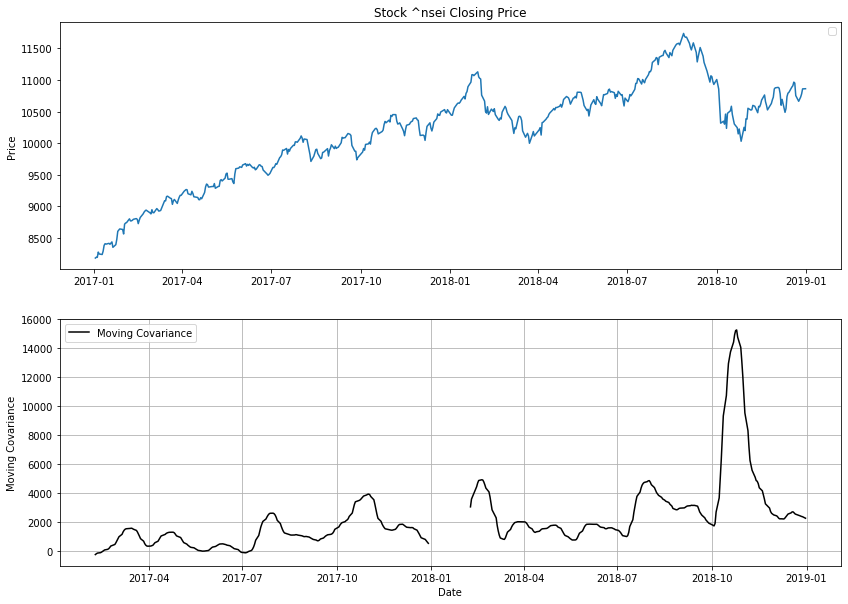

In [13]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df1['Adj Close'])
ax1.set_title('Stock '+ symbol1 +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['M_Cov'], label='Moving Covariance', color='black')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Moving Covariance')
ax2.set_xlabel('Date')

## Candlestick with Covariance

In [14]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df1.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,17167.770833,8210.099609,8212.000000,8133.799805,8179.500000,8179.500000,118300,False
1,17168.770833,8196.049805,8219.099609,8148.600098,8192.250000,8192.250000,127300,False
2,17169.770833,8202.650391,8218.500000,8180.899902,8190.500000,8190.500000,132400,False
3,17170.770833,8226.650391,8282.650391,8223.700195,8273.799805,8273.799805,159100,True
4,17171.770833,8281.849609,8306.849609,8233.250000,8243.799805,8243.799805,139400,False


Text(0.5, 0, 'Date')

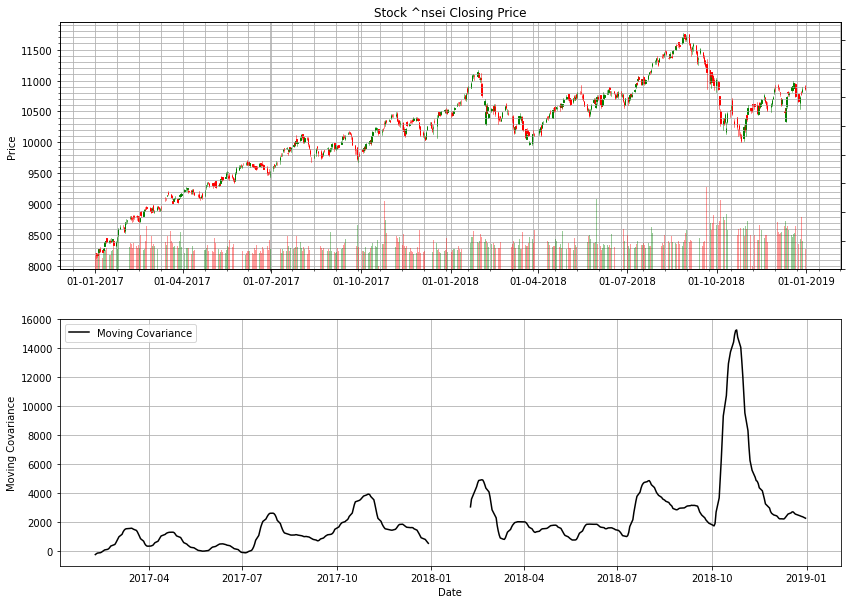

In [16]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df1.Volume.max())
ax1.set_title('Stock '+ symbol1 +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['M_Cov'], label='Moving Covariance', color='black')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Moving Covariance')
ax2.set_xlabel('Date')